In [440]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [441]:
from torchvision import datasets, transforms
import torch
import torch.nn as nn

In [442]:
#reading the abalone data
data = pd.read_csv('abalone.data', header=None)
data

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [443]:
#replace the column names in the data as sex, length, diameter, height, whole weight, shucked weight, viscera weight, shell weight, rings
data.columns = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
data.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [444]:
#dropping the rows with rings 23,22,27,24,1,26,29,2,25,3,21
data = data.drop(data[data['rings'] == 23].index)
data = data.drop(data[data['rings'] == 22].index)
data = data.drop(data[data['rings'] == 27].index)
data = data.drop(data[data['rings'] == 24].index)
data = data.drop(data[data['rings'] == 1].index)
data = data.drop(data[data['rings'] == 26].index)
data = data.drop(data[data['rings'] == 29].index)
data = data.drop(data[data['rings'] == 2].index)
data = data.drop(data[data['rings'] == 25].index)
data = data.drop(data[data['rings'] == 3].index)
data = data.drop(data[data['rings'] == 21].index)

In [445]:
#separating the features and the target
X = data.drop('rings', axis=1)
y = data['rings']

In [446]:
#filter warnings
import warnings
warnings.filterwarnings('ignore')

In [447]:
#encoding the data with ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = enc.fit_transform(X)

In [448]:
#converting x to dataframe
X = pd.DataFrame(X)
X.columns = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight']
X.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
0,2.0,63.0,53.0,17.0,702.0,411.0,197.0,259.0
1,2.0,42.0,33.0,16.0,272.0,172.0,92.0,109.0
2,0.0,78.0,64.0,25.0,949.0,473.0,278.0,370.0
3,2.0,60.0,53.0,23.0,705.0,394.0,223.0,269.0
4,1.0,38.0,31.0,14.0,240.0,153.0,74.0,83.0


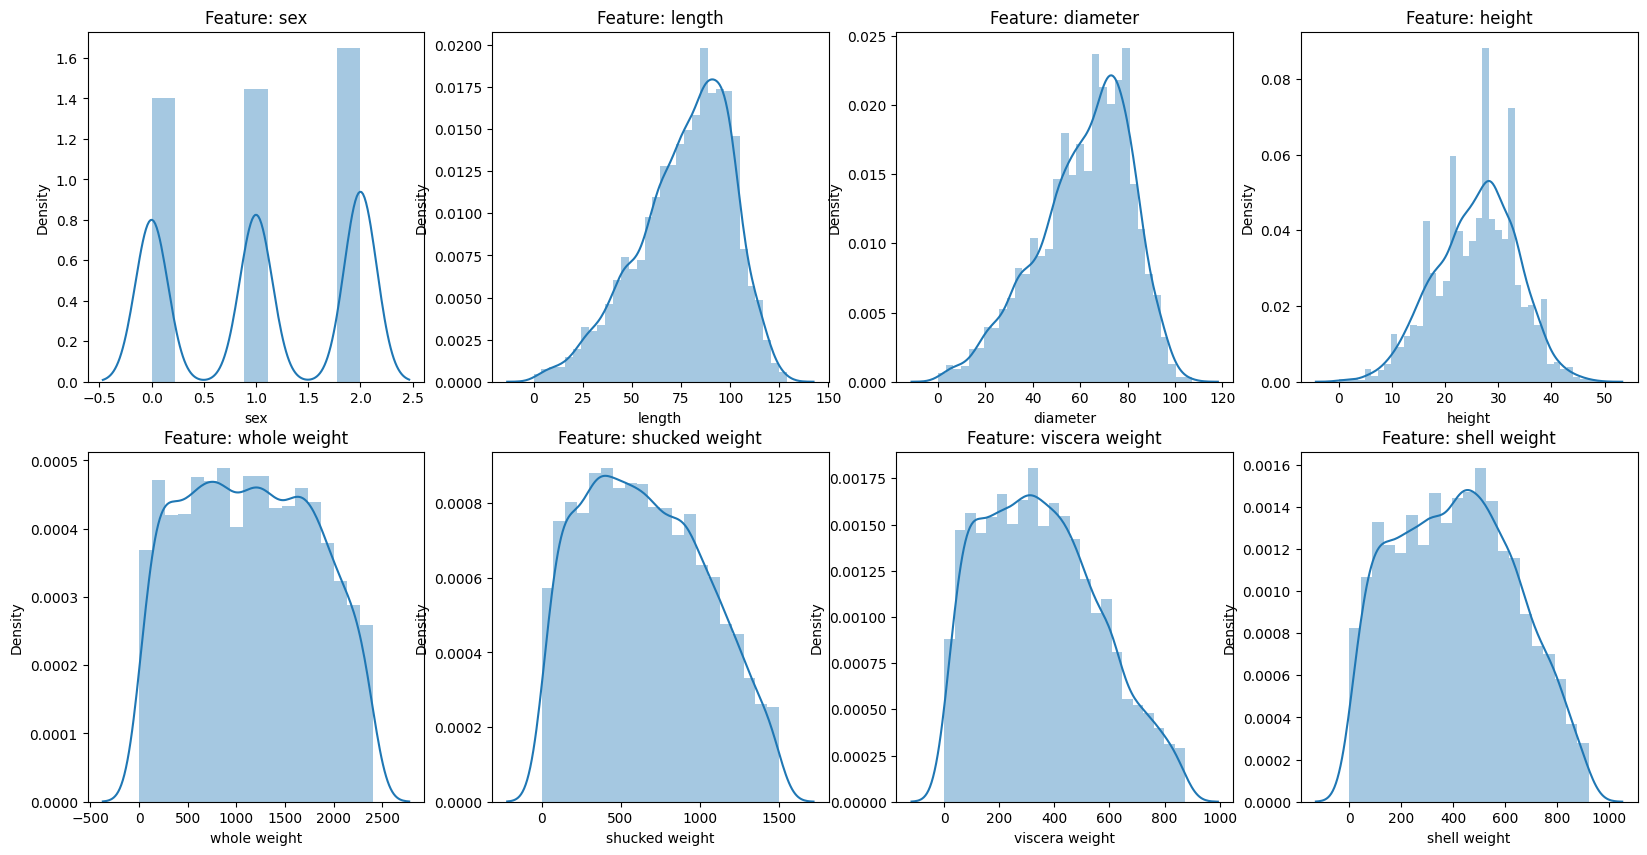

In [449]:
#visualization of the data
import seaborn as sns
#plotting the distribution of each feature
fig, ax = plt.subplots(2,4, figsize=(20, 10))
for i in range(8):
    sns.distplot(X.iloc[:,i], ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title('Feature: {}'.format(X.columns[i]))
plt.show()


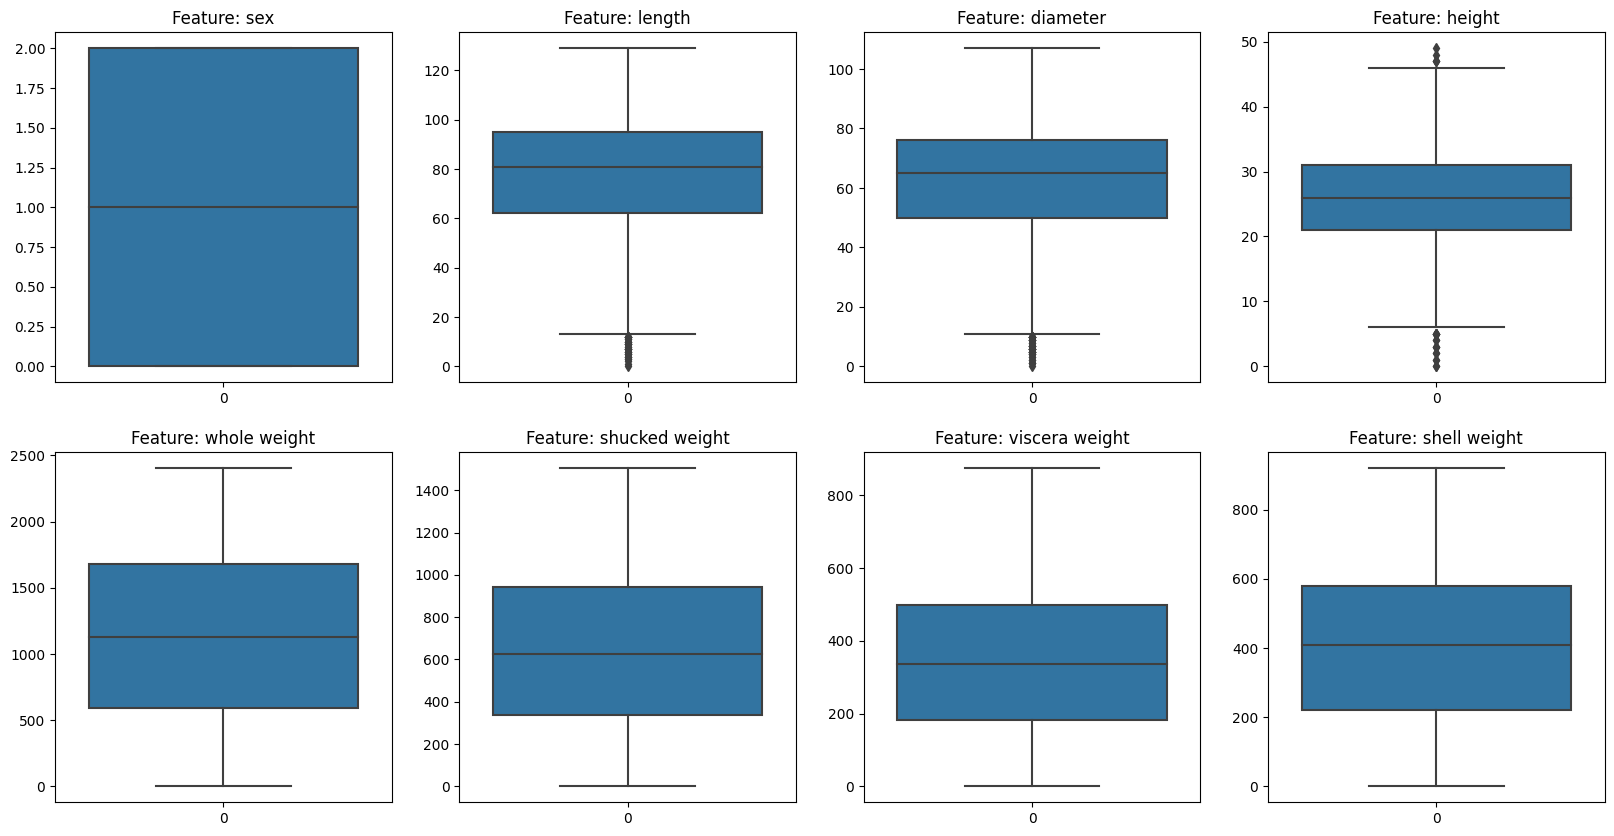

In [450]:
#plotting the boxplot of each feature
fig, ax = plt.subplots(2,4, figsize=(20, 10))
for i in range(8):
    sns.boxplot(X.iloc[:,i], ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title('Feature: {}'.format(X.columns[i]))
plt.show()

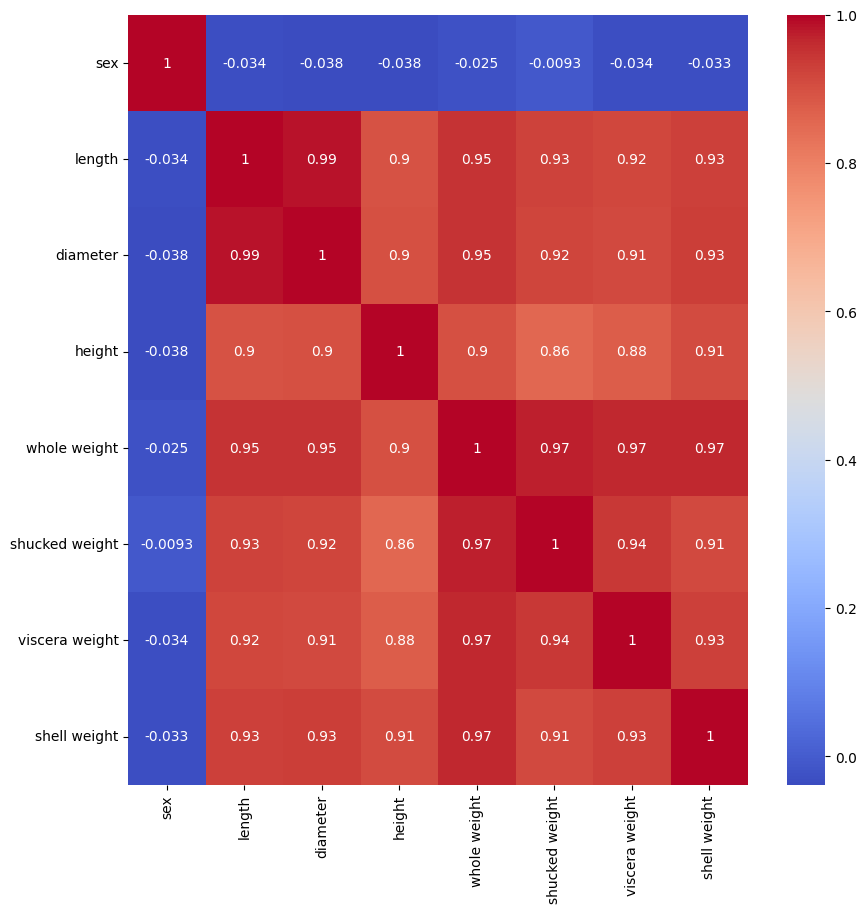

In [451]:
#plotting the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), annot=True,cmap='coolwarm')
plt.show()

In [452]:
# train test split of X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [453]:
# substracting 4 from y_train and y_test
y_train = y_train - 4
y_test = y_test - 4

In [454]:
#Change to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [455]:
def accuracy(logit, target, batch_size):
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()


In [456]:
#Define training hyperprameters.
batch_size = 32
num_epochs = 100
learning_rate = 0.001
size_hidden_1 = 100
size_hidden_2 = 100
num_classes = 17

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train) // batch_size  #batches
cols = X_train.shape[1] #Number of columns in input matrix


In [457]:
#defining the model with 2 hidden layers and 1 output layer hidden activation function is tanh and output activation function is sigmoid
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out
    
model = NeuralNet(cols, size_hidden_1, size_hidden_2, num_classes)

In [458]:
#Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Epoch [1/100], Loss: 2.4155, Accuracy: 9.38%
Epoch [2/100], Loss: 2.4067, Accuracy: 6.25%
Epoch [3/100], Loss: 2.4000, Accuracy: 6.25%
Epoch [4/100], Loss: 2.3919, Accuracy: 6.25%
Epoch [5/100], Loss: 2.3788, Accuracy: 3.12%
Epoch [6/100], Loss: 2.4059, Accuracy: 6.25%
Epoch [7/100], Loss: 2.3809, Accuracy: 28.12%
Epoch [8/100], Loss: 2.3632, Accuracy: 12.50%
Epoch [9/100], Loss: 2.3624, Accuracy: 15.62%
Epoch [10/100], Loss: 2.4133, Accuracy: 21.88%
Epoch [11/100], Loss: 2.3885, Accuracy: 15.62%
Epoch [12/100], Loss: 2.3882, Accuracy: 15.62%
Epoch [13/100], Loss: 2.3675, Accuracy: 12.50%
Epoch [14/100], Loss: 2.4004, Accuracy: 9.38%
Epoch [15/100], Loss: 2.3672, Accuracy: 15.62%
Epoch [16/100], Loss: 2.3690, Accuracy: 9.38%
Epoch [17/100], Loss: 2.3807, Accuracy: 15.62%
Epoch [18/100], Loss: 2.3976, Accuracy: 9.38%
Epoch [19/100], Loss: 2.3927, Accuracy: 9.38%
Epoch [20/100], Loss: 2.3979, Accuracy: 21.88%
Epoch [21/100], Loss: 2.3772, Accuracy: 12.50%
Epoch [22/100], Loss: 2.4063, Ac

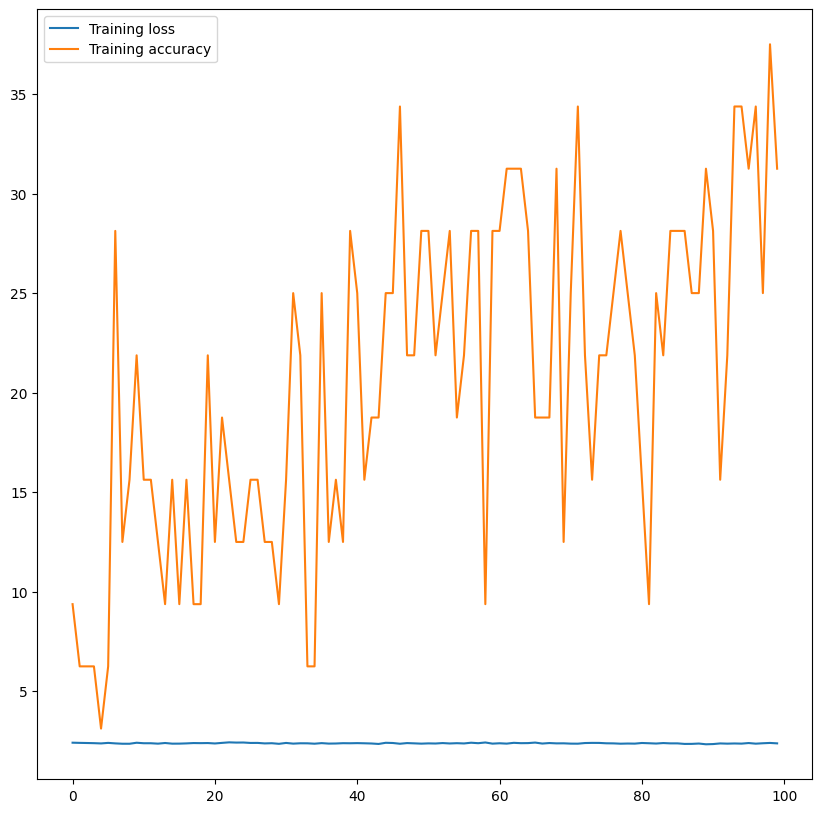

In [460]:
# training the model storing the loss and accuracy in train_loss and train_acc
train_loss = []
train_acc = []
for epoch in range(num_epochs):
    for i in range(batch_no):
        start = i*batch_size
        end = start + batch_size
        inputs = torch.from_numpy(X_train[start:end]).float()
        labels = torch.from_numpy(y_train[start:end]).long()
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss.append(loss.item())
    train_acc.append(accuracy(outputs, labels, batch_size))
    print ('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                   .format(epoch+1, num_epochs, loss.item(), accuracy(outputs, labels, batch_size)))
    
#plotting the loss and accuracy
plt.figure(figsize=(10, 10))
plt.plot(train_loss, label='Training loss')
plt.plot(train_acc, label='Training accuracy')
plt.legend()
plt.show()

In [463]:
# calculating the accuracy and loss on test data
with torch.no_grad():
    inputs = torch.from_numpy(X_test).float()
    labels = torch.from_numpy(y_test).long()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    print ('Test Loss: {:.4f}, Test Accuracy: {:.2f}%'
                   .format(loss.item(), accuracy(outputs, labels, batch_size)/(len(y_test)//batch_size)))


Test Loss: 2.4200, Test Accuracy: 22.75%
